Trying to color with 7 colors
7 colors succeeded! Trying 6 colors
5 2 7 6 2 7 1 1 3 4 6 colors succeeded! Trying 5 colors
6 1 5 5 2 6 1 6 4 3 5 colors succeeded! Trying 4 colors
5 5 3 5 2 1 4 4 2 1 4 colors succeeded! Trying 3 colors
3 3 4 3 1 4 1 2 2 2 Graph is 4 colorable
Greedy  Solution: 4
Backtracking Proof  Solution for 4 :
Graph coloring: [0, 0, 1, 0, 2, 1, 2, 1, 3, 3]


C:\Users\ahmed\AppData\Local\Temp\ipykernel_15900\429610764.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10_colors = plt.cm.get_cmap('tab10', num_colors)


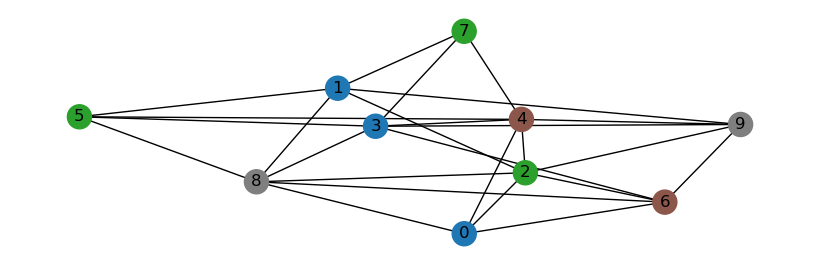

Node colors:
Node 0: Color 3
Node 1: Color 3
Node 2: Color 4
Node 3: Color 3
Node 4: Color 1
Node 5: Color 4
Node 6: Color 1
Node 7: Color 2
Node 8: Color 2
Node 9: Color 2
Trying to color with 4 colors
Graph is 5 colorable
Greedy  Solution: 3
Backtracking Proof  Solution for 5 :
Graph coloring: [0, 1, 2, 1, 0]


<Figure size 640x480 with 0 Axes>

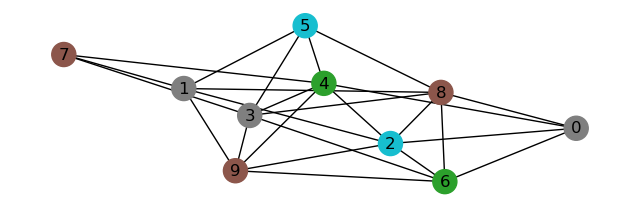

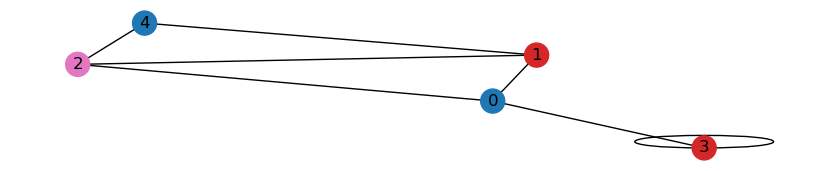

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ahmed\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ahmed\AppData\Local\Temp\ipykernel_15900\429610764.py", line 218, in process_graph
    visualize_colored_graph(graph, final_colors, self.canvas)
  File "C:\Users\ahmed\AppData\Local\Temp\ipykernel_15900\429610764.py", line 20, in visualize_colored_graph
    num_colors = max(final_colors) + 1
                 ^^^^^^^^^^^^^^^^^
ValueError: max() arg is an empty sequence


Trying to color with 5 colors
5 colors succeeded! Trying 4 colors
3 2 5 2 1 4 colors succeeded! Trying 3 colors
4 3 2 1 2 3 colors succeeded! Trying 2 colors
1 3 2 3 2 Graph is 3 colorable
Greedy  Solution: 4
Backtracking Proof  Solution for 3 :
Graph coloring: [0, 1, 2, 1, 2]


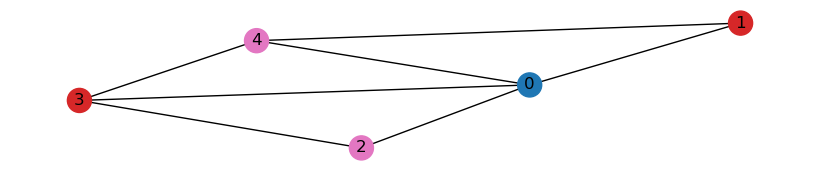

Node colors:
Node 0: Color 1
Node 1: Color 3
Node 2: Color 2
Node 3: Color 3
Node 4: Color 2


<Figure size 640x480 with 0 Axes>

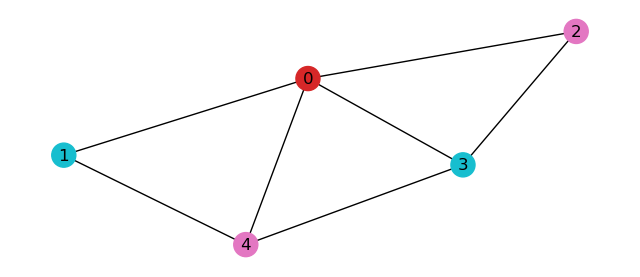

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import tkinter as tk
from tkinter import simpledialog, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from random import randint
from tkinter import ttk, messagebox
import random

# Function to generate distinct colors
def generate_distinct_colors(num_colors):
    tab10_colors = plt.cm.get_cmap('tab10', num_colors)
    return [mcolors.to_hex(color) for color in tab10_colors(range(num_colors))]

# Function to visualize the colored graph within the GUI
def visualize_colored_graph(adjacency_matrix, final_colors, canvas):
    G = nx.from_numpy_array(adjacency_matrix)
    num_colors = max(final_colors) + 1
    node_colors = generate_distinct_colors(num_colors)
    color_map = [node_colors[color_id] for color_id in final_colors]
    
    plt.clf()  # Clear the previous plot
    fig, ax = plt.subplots()
    nx.draw(G, node_color=color_map, with_labels=True, ax=ax)
    canvas.figure = fig
    canvas.draw()

    # Print the node colors in the console
    print("Node colors:")
    for idx, color in enumerate(final_colors):
        print(f"Node {idx}: Color {color}")

def visualize_colored_graph2(adjacency_matrix, final_colors):
    G = nx.from_numpy_array(adjacency_matrix)
    num_colors = max(final_colors) + 1
    node_colors = generate_distinct_colors(num_colors+1)
    color_map = [node_colors[color_id-min(final_colors)] for color_id in final_colors]
    nx.draw(G, node_color=color_map, with_labels=True)
    plt.show()

# Function to input the graph using Tkinter dialogs
def input_graph(choice, n, input_entries):
    if choice == "List":
        graph = input_adjacency_list(n, input_entries)
    elif choice == "Matrix":
        graph = input_adjacency_matrix(n, input_entries)
    elif choice == "Dictionary":
        graph = input_dict(n, input_entries)
    else:
        graph = generate_random_graph(n)
    return graph

def input_adjacency_matrix(n, input_entries):
    graph = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            graph[i][j] = int(input_entries[i][j].get())
    return graph

def input_adjacency_list(n, input_entries):
    adjacency_list = []
    for i in range(n):
        neighbors = list(map(int, input_entries[i].get().split()))
        adjacency_list.append(neighbors)
    return list_to_matrix(adjacency_list, n)

def list_to_matrix(adjacency_list, n):
    graph = np.zeros([n, n])
    for node, neighbors in enumerate(adjacency_list):
        for neighbor in neighbors:
            graph[node][neighbor] = 1
            graph[neighbor][node] = 1
    return graph

def input_dict(n, input_entries):
    adjacency_dict = {}
    for i in range(n):
        neighbors = list(map(int, input_entries[i].get().split()))
        adjacency_dict[i] = neighbors
    return dict_to_matrix(adjacency_dict, n)

def dict_to_matrix(adjacency_dict, n):
    graph = np.zeros((n, n), dtype=int)
    for node, neighbors in adjacency_dict.items():
        for neighbor in neighbors:
            graph[node][neighbor] = 1
            graph[neighbor][node] = 1
    return graph

def generate_random_graph(n):
    graph = np.random.randint(2, size=(n, n))
    graph = np.tril(graph) + np.tril(graph, -1).T
    np.fill_diagonal(graph, 0)
    return graph

def is_safe(node, color, graph, color_assignment):
    for neighbor in range(len(graph)):
        if graph[node][neighbor] == 1 and color_assignment[neighbor] == color:
            return False
    return True

def backtracking_coloring(node, num_colors, graph, color_assignment):
    if node == len(graph):
        return True

    for color in range(num_colors):
        if is_safe(node, color, graph, color_assignment):
            color_assignment[node] = color
            if backtracking_coloring(node + 1, num_colors, graph, color_assignment):
                return True
            color_assignment[node] = -1

    return False

def graph_coloring(graph, num_colors):
    color_assignment = [-1] * len(graph)
    if backtracking_coloring(0, num_colors, graph, color_assignment):
        return color_assignment
    return None

def graph_coloring_solution(n, adjacency_matrix, num_colors):
    color_assignment = graph_coloring(adjacency_matrix, num_colors)
    if color_assignment:
        print("Graph coloring:", color_assignment)
        visualize_colored_graph2(adjacency_matrix, color_assignment)
    else:
        print("No solution found.")

# GUI for graph input and coloring
class GraphColoringApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Graph Coloring")
        self.geometry("800x600")

        self.label = tk.Label(self, text="Enter the number of graph nodes:")
        self.label.pack(pady=10)

        self.node_entry = tk.Entry(self)
        self.node_entry.pack(pady=10)

        self.population_label = tk.Label(self, text="Enter the population size:")
        self.population_label.pack(pady=10)

        self.population_entry = tk.Entry(self)
        self.population_entry.pack(pady=10)

        self.graph_type_label = tk.Label(self, text="Choose graph type:")
        self.graph_type_label.pack(pady=10)

        self.graph_type = ttk.Combobox(self, values=["List", "Matrix", "Dictionary", "Random Graph"])
        self.graph_type.set("Choose graph type")
        self.graph_type.pack(pady=10)

        self.start_button = tk.Button(self, text="Start", command=self.start_graph_coloring)
        self.start_button.pack(pady=10)

        self.reset_button = tk.Button(self, text="Reset", command=self.reset_app)
        self.reset_button.pack(pady=10)

        self.input_frame = tk.Frame(self)
        self.input_frame.pack(pady=10)

        self.input_entries = []

        # Create a canvas for matplotlib figure
        self.figure = plt.figure()
        self.canvas = FigureCanvasTkAgg(self.figure, self)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def create_input_fields(self, n, input_type):
        for widget in self.input_frame.winfo_children():
            widget.destroy()
        self.input_entries = []
        if input_type == "Matrix":
            for i in range(n):
                row_entries = []
                for j in range(n):
                    entry = tk.Entry(self.input_frame, width=5)
                    entry.grid(row=i, column=j)
                    row_entries.append(entry)
                self.input_entries.append(row_entries)
        else:
            for i in range(n):
                entry = tk.Entry(self.input_frame, width=50)
                entry.grid(row=i, column=0)
                self.input_entries.append(entry)

    def start_graph_coloring(self):
        global n
        n = int(self.node_entry.get())
        population_size = int(self.population_entry.get())
        graph_type = self.graph_type.get()

        if graph_type in ["List", "Matrix", "Dictionary"]:
            self.create_input_fields(n, graph_type)
            self.start_button.config(text="Submit", command=self.process_graph)
        else:
            graph = generate_random_graph(n)
            max_num_colors = GetMaxColors(graph)
            final_colors = genetic_algorithm_coloring(n, graph, max_num_colors, population_size)
            distinct_color = len(set(final_colors))
            if final_colors is not None:
                messagebox.showinfo("Result", f"Graph is {distinct_color} colorable")
                visualize_colored_graph(graph, final_colors, self.canvas)
            else:
                messagebox.showinfo("Result", "No solution found")

    def process_graph(self):
        graph_type = self.graph_type.get()
        graph = input_graph(graph_type, n, self.input_entries)
        max_num_colors = GetMaxColors(graph)
        final_colors = genetic_algorithm_coloring(n, graph, max_num_colors, int(self.population_entry.get()))
        if final_colors is not None:
            messagebox.showinfo("Result", f"Graph is {max_num_colors} colorable")
            visualize_colored_graph(graph, final_colors, self.canvas)
        else:
            messagebox.showinfo("Result", "No solution found")

    def reset_app(self):
        self.destroy()
        self.__init__()

def GetMaxColors(graph):
    MaxNumColors = 0
    for row in graph:
        summ = int(sum(row)) + 1
        if summ > MaxNumColors:
            MaxNumColors = summ
    return MaxNumColors

def CreateChromosome(MaxNumColors):
    return np.random.randint(1, MaxNumColors + 1, size=(n))

def CreatePopulation(MaxNumColors, PopulationSize):
    return np.array([CreateChromosome(MaxNumColors) for i in range(PopulationSize)])

def CalculateFitness(graph, chromosome):
    penalty = 0
    for vertex in range(n):
        for neighbor in range(vertex, n):
            if graph[vertex][neighbor] == 1 and chromosome[vertex] == chromosome[neighbor]:
                penalty += 1
    return penalty

def TruncationSelection(graph, population):
    FitnessResult = [CalculateFitness(graph, chromosome) for chromosome in population]
    sortedChromosomes = []
    NumSelectedChromosome = n*3/ 4
    for i in range(NumSelectedChromosome):
        best = FitnessResult[0]
        bestIdx = 0
        for j in range(len(FitnessResult)):
            if FitnessResult[j] < best:
                best = FitnessResult[j]
                bestIdx = j
        FitnessResult[bestIdx] = 0
        sortedChromosomes.append(population[bestIdx])
    return sortedChromosomes

def TournamentSelection(graph, population, PopulationSize):
    PopulationNew = []
    for _ in range(2):
        random.shuffle(population)
        for i in range(0, PopulationSize - 1, 2):
            if CalculateFitness(graph, population[i]) < CalculateFitness(graph, population[i + 1]):
                PopulationNew.append(population[i])
            else:
                PopulationNew.append(population[i + 1])
    return PopulationNew

def OnePointCrossover(ParentOne, ParentTwo):
    splitPoint = randint(1, n - 1)
    ChildOne = np.concatenate((ParentOne[:splitPoint], ParentTwo[splitPoint:]))
    ChildTwo = np.concatenate((ParentTwo[:splitPoint], ParentOne[splitPoint:]))
    return ChildOne, ChildTwo

def TwoPointCrossover(ParentOne, ParentTwo):
    firstPoint = randint(1, n - 3)
    secondPoint = randint(firstPoint + 1, n - 1)
    ChildOne = np.concatenate((ParentOne[:firstPoint], ParentTwo[firstPoint:secondPoint], ParentOne[secondPoint:]))
    ChildTwo = np.concatenate((ParentTwo[:firstPoint], ParentOne[firstPoint:secondPoint], ParentTwo[secondPoint:]))
    return ChildOne, ChildTwo

def Mutation(graph, chromosome, Chance, maxNumColors):
    possible = random.uniform(0, 1)
    if Chance <= possible:
        for vertex in range(n):
            for neighbor in range(vertex, n):
                if graph[vertex][neighbor] == 1 and chromosome[vertex] == chromosome[neighbor]:
                    chromosome[vertex] = randint(1, maxNumColors)
    return chromosome

def MinColorsUsingGreedy(graph):
    numColors = 0
    colors = [-1] * n
    for node in range(n):
       remainingColors = set(range(numColors))
       for neighbor in range(n):
            if graph[node][neighbor] == 1 and colors[neighbor] != -1:
                remainingColors.discard(colors[neighbor])
       if len(remainingColors) > 0:
           colors[node] = min(remainingColors)
       else:
           colors[node] = numColors
           numColors += 1
    return numColors

def genetic_algorithm_coloring(n, graph, maxNumColors, PopulationSize):
    FinalColors = []
    if n == 1:
        print('Graph is 1 colorable')
    elif n == 2:
        if 1 in graph[0]:
            print('Graph is 2 colorable')
        else:
            print('Graph is 1 colorable')
    else:
        checkCount = 0
        failedColors = 0

        print(f'Trying to color with {maxNumColors} colors')
        while True:
            population = CreatePopulation(maxNumColors, PopulationSize)
            bestFitness = CalculateFitness(graph, population[0])
            fittest = population[0]

            generation = 0
            numGenerations = 50

            if n > 5:
                numGenerations = n * 15

            while bestFitness != 0 and generation != numGenerations:
                generation += 1

                population = TournamentSelection(graph, population, PopulationSize)
                if len(population) % 2 != 0:
                    population.pop()

                childrenPopulation = []
                random.shuffle(population)
                for i in range(0, len(population) - 1, 2):
                    child1, child2 = OnePointCrossover(population[i], population[i + 1])
                    childrenPopulation.append(child1)
                    childrenPopulation.append(child2)

                for chromosome in childrenPopulation:
                    if generation < 200:
                        chromosome = Mutation(graph, chromosome, 0.65, maxNumColors)
                    elif generation < 400:
                        chromosome = Mutation(graph, chromosome, 0.5, maxNumColors)
                    else:
                        chromosome = Mutation(graph, chromosome, 0.15, maxNumColors)

                for i in range(len(population), PopulationSize):
                    population.append(CreateChromosome(maxNumColors))

                population = childrenPopulation
                bestFitness = CalculateFitness(graph, population[0])
                fittest = population[0]
                for individual in population:
                    if(CalculateFitness(graph, individual) < bestFitness):
                        bestFitness = CalculateFitness(graph, individual)
                        fittest = individual
                if bestFitness == 0:
                    FinalColors = fittest
                    break
            if bestFitness == 0:
                print(f'{maxNumColors} colors succeeded! Trying {maxNumColors - 1} colors')
                maxNumColors -= 1
                checkCount = 0
            else:
                checkCount+=1
                if(checkCount<3):
                  continue
                maxNumColors+=1
                print(f'Graph is {maxNumColors} colorable')
                print('Greedy  Solution:', MinColorsUsingGreedy(graph))
                break
            for i in FinalColors:
              print(i, end=" ")
    print(f'Backtracking Proof  Solution for {maxNumColors} :')
    graph_coloring_solution(n, graph, maxNumColors)
    return FinalColors

if __name__ == '__main__':
    app = GraphColoringApp()
    app.mainloop()
